In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc

from scipy import stats

import math
import os
import random


In [2]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [21]:
# Open the pre-processed csv
# Set the index to get rid of 'unnamed: 32' column
df = pd.read_csv('data/breast_cancer.csv', index_col=[32])

(569, 32)
(569, 32)


In [32]:
## Get info about breast cancer dataset
print(f'Shape\n{df.shape}')
print(f'Columns\n{df.columns}')
print(f'dtypes\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)

Shape
(569, 32)
Columns
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
dtypes
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
conc

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


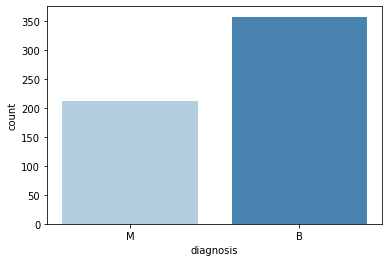

In [23]:
## Count the different diagnosis values
sns.countplot(df['diagnosis'],
              palette='Blues',
              label="Diagnoses Count", )
plt.plot()
plt.savefig('data/charts/bc_diag_countplot.png')

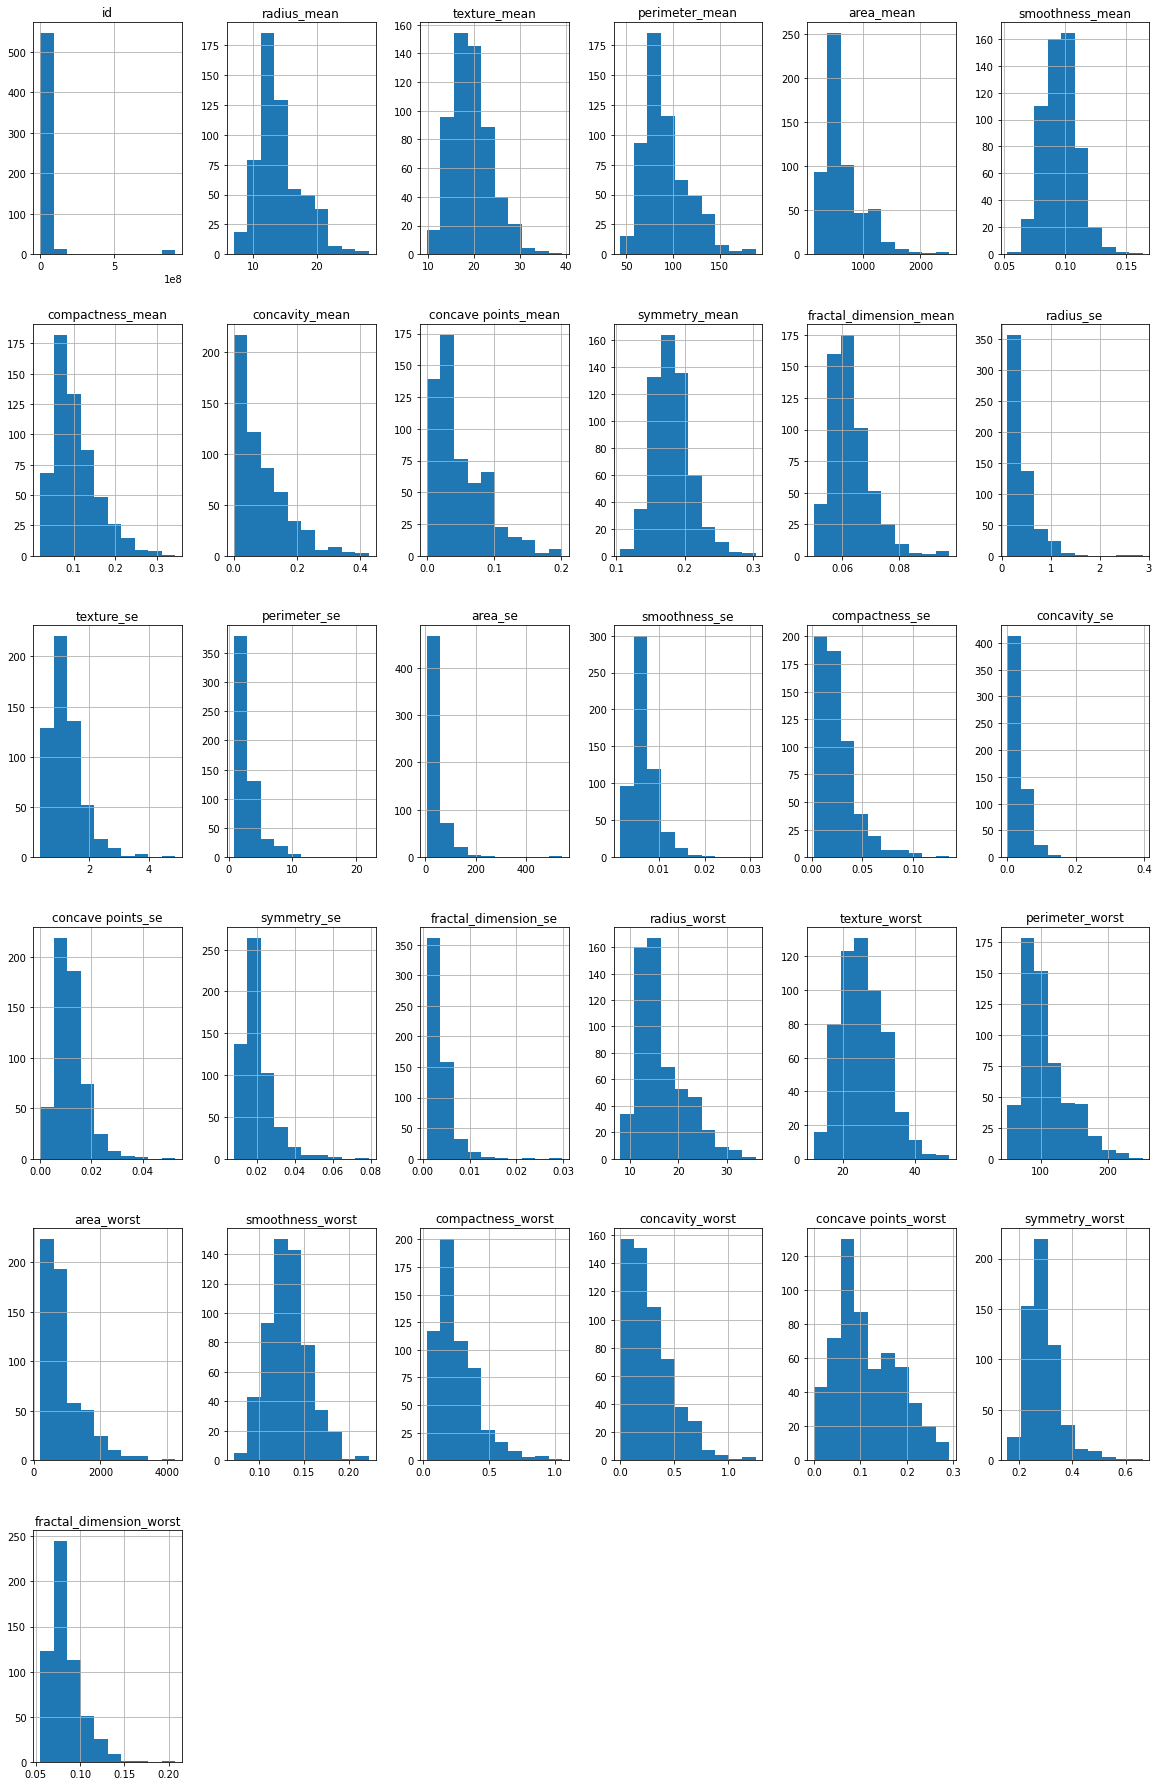

<Figure size 432x288 with 0 Axes>

In [30]:
# Create mini-histograms for each attribute

# First remove attributes that can't be charted
# df_density = df.__deepcopy__()
# df_density.drop('Unnamed: 32')
df.hist(bins=10,
        figsize=(20, 32))
plt.show()

# Build density plots
# df_density.plot(kind='density',
#                 subplots=True,
#                 sharex=False,
#                 layout=(8,5))
# plt.show()
plt.savefig('data/charts/bc_histogram_plots.png')


[]

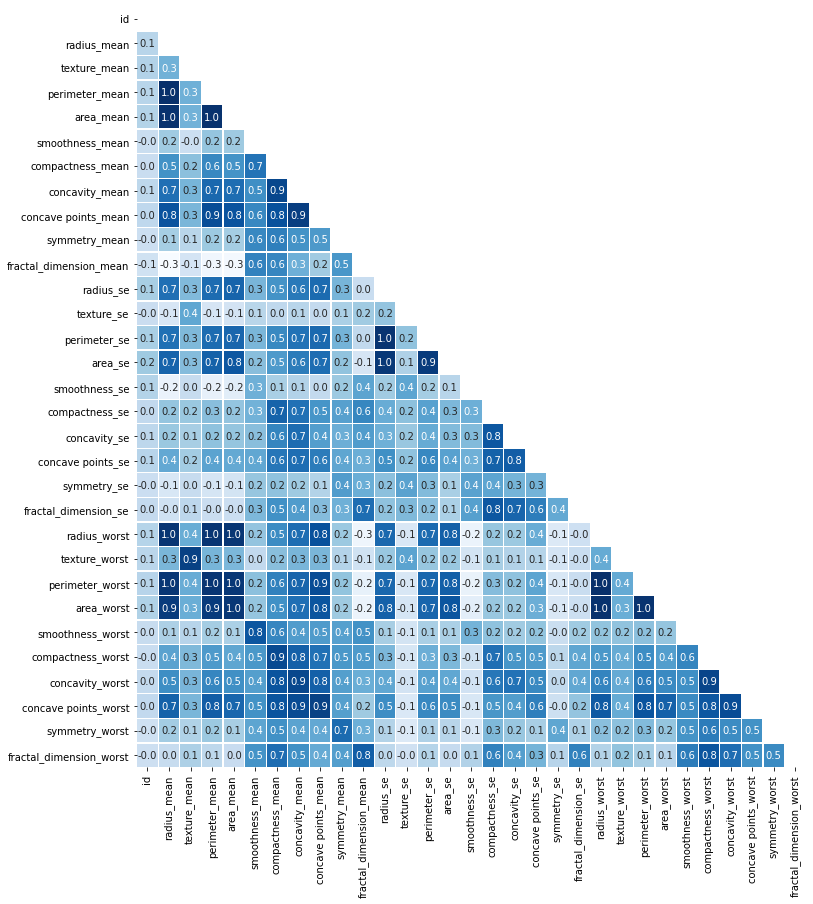

In [31]:
# Build a heatmap to find the attributes that correlate the most
f, ax = plt.subplots(figsize=(12, 14))
conf_matrix = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot=True,
            cbar=0,
            linewidths=.3,
            fmt='.1f',
            mask=conf_matrix,
            cmap='Blues',
            ax=ax)
plt.plot()

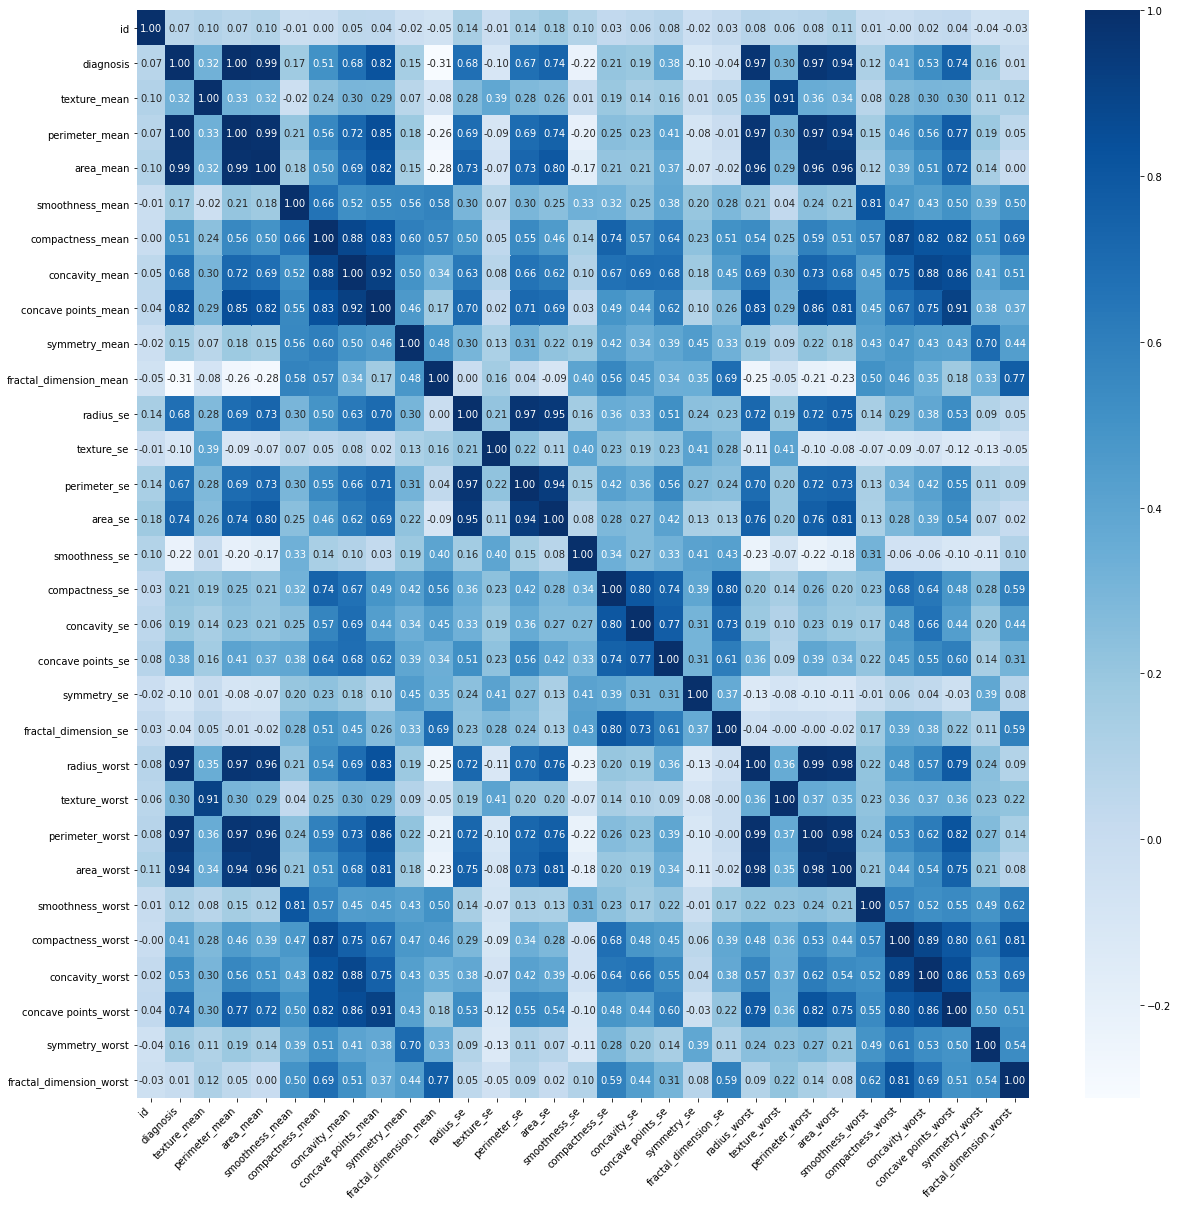

In [34]:
corrs = df.corr()
col_names = ['id',
             'diagnosis',
             'texture_mean',
             'perimeter_mean',
             'area_mean',
             'smoothness_mean',
             'compactness_mean',
             'concavity_mean',
             'concave points_mean',
             'symmetry_mean',
             'fractal_dimension_mean',
             'radius_se',
             'texture_se',
             'perimeter_se',
             'area_se',
             'smoothness_se',
             'compactness_se',
             'concavity_se',
             'concave points_se',
             'symmetry_se',
             'fractal_dimension_se',
             'radius_worst',
             'texture_worst',
             'perimeter_worst',
             'area_worst',
             'smoothness_worst',
             'compactness_worst',
             'concavity_worst',
             'concave points_worst',
             'symmetry_worst',
             'fractal_dimension_worst']


fig, ax = plt.subplots(figsize=(20, 20))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".2f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.show()

In [35]:
# Find the amount of correlation between each column and the diagnosis
print('Amount of correlation (Pearsons r) for each column:')
for (col_name, _) in df.iteritems():
    print(f"{col_name}: {df[col_name].corr(df['diagnosis'], method='pearson'):.2f}")

Amount of correlation (Pearsons r) for each column:


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [37]:
# Convert the diagnosis column to integer so it can be correlated against the other columns
df['diagnosis'] = (df['diagnosis'] !='M').astype(int)

In [38]:
# Find the amount of correlation between each column and the diagnosis
corrs = df.corr()
corr_quality = corrs['diagnosis']
print('Amount of correlation (Pearsons r) for each column:')
print(corr_quality.sort_values(ascending=False))

Amount of correlation (Pearsons r) for each column:
diagnosis                  1.000000
smoothness_se              0.067016
fractal_dimension_mean     0.012838
texture_se                 0.008303
symmetry_se                0.006522
id                        -0.039769
fractal_dimension_se      -0.077972
concavity_se              -0.253730
compactness_se            -0.292999
fractal_dimension_worst   -0.323872
symmetry_mean             -0.330499
smoothness_mean           -0.358560
concave points_se         -0.408042
texture_mean              -0.415185
symmetry_worst            -0.416294
smoothness_worst          -0.421465
texture_worst             -0.456903
area_se                   -0.548236
perimeter_se              -0.556141
radius_se                 -0.567134
compactness_worst         -0.590998
compactness_mean          -0.596534
concavity_worst           -0.659610
concavity_mean            -0.696360
area_mean                 -0.708984
radius_mean               -0.730029
area_worst  

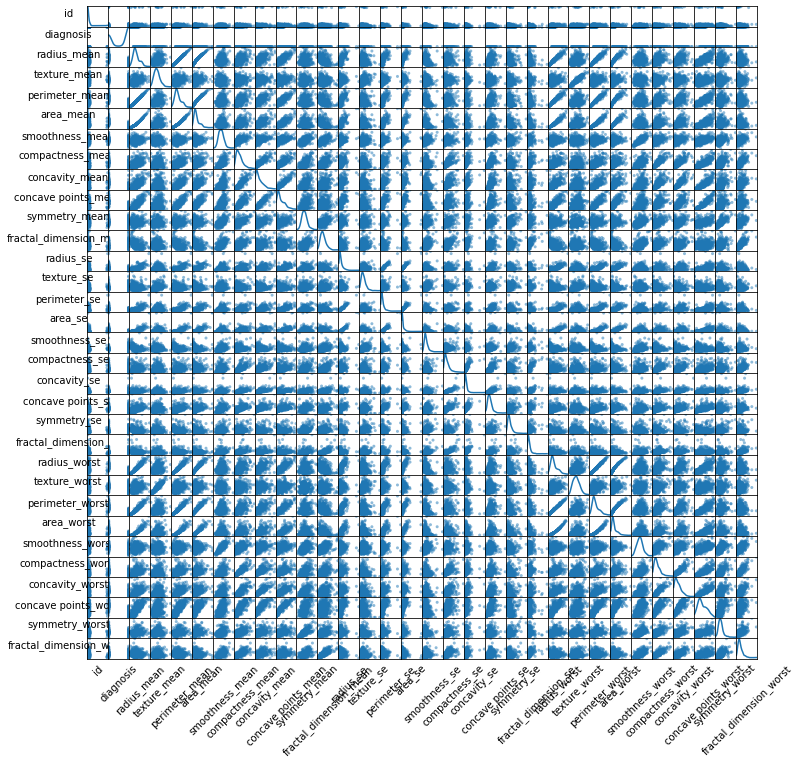

In [39]:
# Create a scatterplot matrix with a Kernel Density estimation on the diagonal
scatter_matrix = pd.plotting.scatter_matrix(df, diagonal='kde', cmap='Blues', figsize=(12, 12))

#May need to offset label when rotating to prevent overlap of figure
[scat.get_yaxis().set_label_coords(-1.4, 0.4) for scat in scatter_matrix.reshape(-1)]

# Rotate all of the column names
[scat.xaxis.label.set_rotation(35) for scat in scatter_matrix.reshape(-1)]
[scat.yaxis.label.set_rotation(0) for scat in scatter_matrix.reshape(-1)]

# Remove all of the markings and numbers along the axes
[scat.set_xticks(()) for scat in scatter_matrix.reshape(-1)]
[scat.set_yticks(()) for scat in scatter_matrix.reshape(-1)]

plt.show()


[]

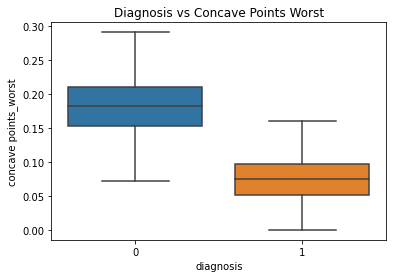

In [40]:
###############################
# Build boxplots for the most correlated against the diagnosis (3)

## Concave Points Worst
plot = sns.boxplot(x='diagnosis',
                   y='concave points_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs Concave Points Worst')
plt.plot()

In [ ]:
## Perimeter Worst
plot = sns.boxplot(x='diagnosis',
                   y='perimeter_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Perimeter Worst')
plt.plot()

[]

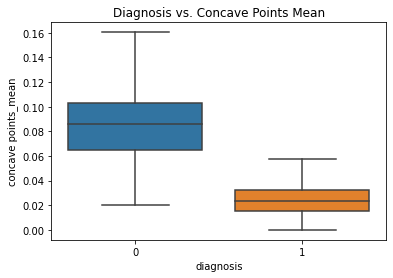

In [41]:
## Concave Points Mean
plot = sns.boxplot(x='diagnosis',
                   y='concave points_mean',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Concave Points Mean')
plt.plot()


In [ ]:
## Radius Worst
plot = sns.boxplot(x='diagnosis',
                   y='radius_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Radius Worst')
plt.plot()


[]

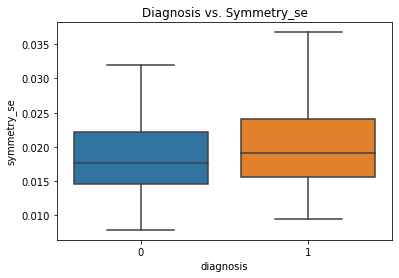

In [42]:
## Symmetry_se - the attribute that correlates the least
plot = sns.boxplot(x='diagnosis',
                   y='symmetry_se',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Symmetry_se')
plt.plot()

In [43]:
## Split the data up.
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=14)
print(df.shape)

(569, 32)


In [44]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# using decisiontreeclassifier
tree = dtc(criterion = 'gini', random_state = 0)
tree.fit(X_train, y_train)
print('[3]decision tree classifier training accuracy:', tree.score(X_train, y_train))

[3]decision tree classifier training accuracy: 1.0


In [48]:
tree_predictions = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'tree accuracy = {tree_accuracy}')

tree accuracy = 0.8888888888888888


In [45]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))

clf = gridsearchcv(dtc(), {
    'criterion':['gini', 'entropy'],
    'max_depth':[count for count in range(1, 30)]
}, cv=9,
   return_train_score=True,
   scoring=make_scorer(mean_squared_error))

clf.fit(X_train, y_train)
# print(clf.cv_results_)

### Output the results

# print("Decision Tree Grid Search Results:")
# dtc_df = pd.DataFrame(clf.cv_results_)
# pd.set_option('display.max_columns', None)
# print(dtc_df)
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')
dtc_best_estimate = clf.best_estimator_
print(dtc_best_estimate)

## Now we have found the best parameters, use them...
dtc_best_estimate.fit(X_train,y_train)

dtc_predictor = dtc_best_estimate.predict(X_train)
mse = mean_squared_error(dtc_predictor, y_train)
r2 = r2_score(dtc_predictor, y_train)
print(f'Training Mean Square Error: {mse:.2f}')
print(f'Training R2: {r2:.2f}')

dtc_y_predictor = dtc_best_estimate.predict(X_test)
mse = mean_squared_error(y_test, dtc_y_predictor)
r2 = r2_score(y_test, dtc_y_predictor)
print(f'Testing Mean Square Error: {mse:.2f}')
print(f'Testing R2: {r2:.2f}')

Best parameters: {'criterion': 'entropy', 'max_depth': 1}
Best score: 0.11818181818181817
DecisionTreeClassifier(criterion='entropy', max_depth=1)
Training Mean Square Error: 0.08
Training R2: 0.65
Testing Mean Square Error: 0.09
Testing R2: 0.63



              precision    recall  f1-score   support

           0       0.93      0.83      0.88        64
           1       0.90      0.96      0.93       107

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



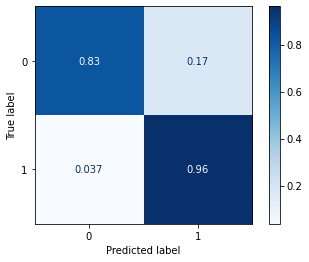

In [49]:
dtc_cm = confusion_matrix(y_test, dtc_y_predictor)
print()# Print a new line
plot_confusion_matrix(dtc_best_estimate,
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      normalize='true' )

print(classification_report(y_test, dtc_y_predictor))
